In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [5]:
tickers = [s.replace('\n', '') for s in tickers]

In [7]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- BRK.B: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CEG: Data doesn't exist for startDate = 1577854800, endDate = 1641013200


In [8]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [9]:
import seaborn as sns

In [10]:
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,A,84.371025,85.949997,86.349998,85.199997,85.900002,1410500.0
497,2020-01-03,A,83.016373,84.570000,85.330002,84.500000,84.669998,1118300.0
994,2020-01-06,A,83.261787,84.820000,84.820000,83.599998,84.000000,1993200.0
1491,2020-01-07,A,83.516998,85.080002,85.260002,83.940002,83.959999,1684700.0
1988,2020-01-08,A,84.341583,85.919998,86.470001,85.199997,85.959999,1847600.0
...,...,...,...,...,...,...,...,...
250049,2021-12-27,ZTS,246.114746,246.509995,246.720001,243.080002,244.389999,807000.0
250549,2021-12-28,ZTS,243.858383,244.250000,247.839996,243.639999,247.000000,1004400.0
251049,2021-12-29,ZTS,246.633926,247.029999,247.850006,243.639999,244.020004,939900.0
251549,2021-12-30,ZTS,244.766922,245.160004,249.270004,244.960007,247.050003,859100.0


<AxesSubplot:xlabel='Date', ylabel='Close'>

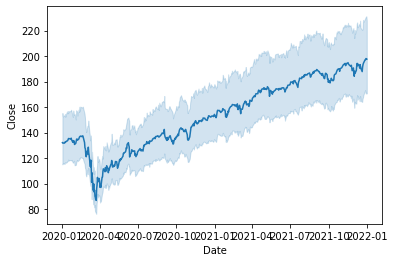

In [12]:
sns.lineplot(x = 'Date', y = 'Close', data = df)